In [1]:
from skimage import io
from sklearn.cluster import KMeans
import numpy as np

In [14]:
image = io.imread('cat.png')

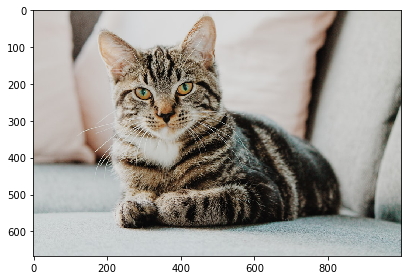

In [15]:
io.imshow(image);

In [16]:
image.shape

(667, 1000, 3)

In [17]:
# preprocessing
rows, cols = image.shape[0], image.shape[1]
image = image.reshape(rows * cols, 3)

In [18]:
print(image.shape)
print(image[:5])

(667000, 3)
[[203 198 194]
 [203 198 194]
 [203 198 194]
 [203 198 194]
 [203 198 194]]


In [19]:
# modelling
kMeans = KMeans(n_clusters = 16)
kMeans.fit(image)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=16, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [20]:
# centers
centers = np.asarray(kMeans.cluster_centers_, dtype = np.uint8)
centers

array([[201, 200, 198],
       [ 35,  30,  23],
       [141, 114,  86],
       [109, 106,  95],
       [177, 162, 147],
       [102,  87,  70],
       [210, 211, 211],
       [ 16,  14,  11],
       [167, 176, 175],
       [130, 130, 120],
       [146, 153, 150],
       [ 57,  48,  38],
       [ 78,  69,  55],
       [190, 180, 171],
       [163, 141, 120],
       [193, 192, 189]], dtype=uint8)

In [21]:
# labels 
labels = np.asarray(kMeans.labels_, dtype = np.uint8)
print(labels.shape)
labels = np.reshape(labels, (rows, cols))
print(labels.shape)
labels

(667000,)
(667, 1000)


array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  6,  6, ..., 15,  8,  8],
       [ 0,  0,  6, ..., 15,  8,  8],
       [ 0,  0,  6, ...,  8,  8,  8]], dtype=uint8)

In [25]:
# reconstructing
newImage = np.zeros((rows, cols, 3), dtype = np.uint8)
for i in range(rows):
    for j in range(cols):
            # assinging every pixel the rgb color of their label's center 
            newImage[i, j, :] = centers[labels[i, j], :]
io.imsave('cat-compressed.png', newImage);

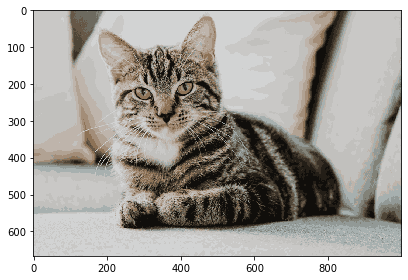

In [26]:
io.imshow(newImage);